In [121]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plot
import random

# Notes to self:
# 0.2 seems to be a good cutoff for distinguishing. Maybe use priority queue with parameter length instead (seems safer)

In [122]:
# Binning values of one order parameter to create a 1 dimensional probability space
def d1_bin(x, bins):
    
    min_val = np.amin(x)
    max_val = np.amax(x)
    span = max_val - min_val
    
    p_x = [0.0 for i in range(bins)]
    
    for i in x:
        bin_num = (int) (bins * (i - min_val) / span)
        if bin_num == bins:
            bin_num -= 1
        p_x[bin_num] += 1.0 / len(x)
    
    return p_x


In [123]:
# Binning valus of two order parameters to create a 2 dimensional probability space
def d2_bin(x, y, bins):
    
    if len(x) != len(y):
        raise Exception("Order parameter lists are of different size.")
    
    min_x = np.amin(x)
    max_x = np.amax(x)
    span_x = max_x - min_x
    
    min_y = np.amin(y)
    max_y = np.amax(y)
    span_y = max_y - min_y
    
    p_xy = [[0.0 for i in range(bins)] for j in range(bins)]
    
    for i in range(len(x)):
        bin_x = (int) (bins * (x[i] - min_x) / span_x)
        bin_y = (int) (bins * (y[i] - min_y) / span_y)
        if bin_x == bins:
            bin_x -= 1
        if bin_y == bins:
            bin_y -= 1
        p_xy[bin_x][bin_y] += 1.0 / len(x)
    
    return p_xy


In [124]:
# Calculates Kullback–Leibler Divergence of two order parameters, namely D(x || y)
def kl_div(x, y, bins = 100):
    
    p_x = d1_bin(x, bins)
    p_y = d1_bin(y, bins)
    
    kl = 0.0
    
    for i in range(len(p_x)):
        if p_x[i] != 0 and p_y[i] != 0:
            kl += p_x[i] * np.log(p_x[i] / p_y[i])
        
    return kl
    

In [125]:
# Calculates mutual information of two order parameters
def mutual_info(x, y, bins = 100):
    
    p_x = d1_bin(x, bins)
    p_y = d1_bin(y, bins)
    p_xy = d2_bin(x, y, bins)
    
    info = 0
    
    for i in range(len(p_x)):
        for j in range(len(p_y)):
            if p_xy[i][j] != 0:
                info += p_xy[i][j] * np.log(p_xy[i][j] / (p_x[i] * p_y[j]))
    
    return info


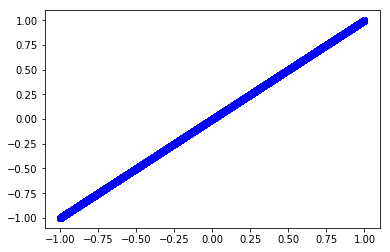

4.601716335885666


In [126]:
# Straight positive slope line (is redundant)
x = []
y = []
for i in range(10000):
    tmp = random.random()
    x.append(1 - (2 * tmp))
    y.append(1 - (2 * tmp))
plot.plot(x, y, "bo")
plot.show()
print(mutual_info(x, y))

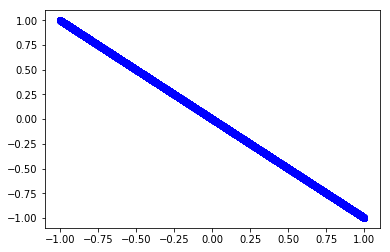

4.600407364089707


In [127]:
# Straight negative slope line (is redundant)
x = []
y = []
for i in range(10000):
    tmp = random.random()
    x.append(1 - (2 * tmp))
    y.append((2 * tmp) - 1)
plot.plot(x, y, "bo")
plot.show()
print(mutual_info(x, y))

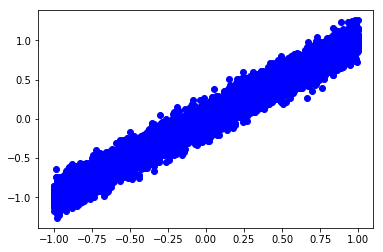

1.7810441472248106
0.34361301611801415
0.14997763730261307


In [128]:
# Positive Correlation (is redundant)
x = []
y = []
for i in range(10000):
    tmp = random.random()
    x.append(1 - (2 * tmp))
    y.append(1 - (2 * tmp) + np.random.normal(0, 0.1))
plot.plot(x, y, "bo")
plot.show()
print(mutual_info(x, y))
print(kl_div(x, y))
print(kl_div(y, x))

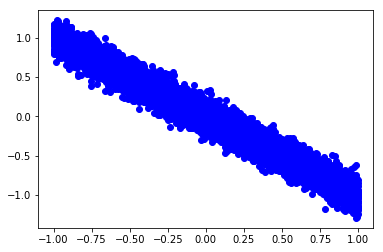

1.7642916406002558
0.31154440649403525
0.1412286790917419


In [129]:
# Negative Correlation (is redundant)
x = []
y = []
for i in range(10000):
    tmp = random.random()
    x.append(2 * tmp - 1)
    y.append(1 - 2 * tmp + np.random.normal(0, 0.1))
plot.plot(x, y, "bo")
plot.show()
print(mutual_info(x, y))
print(kl_div(x, y))
print(kl_div(y, x))

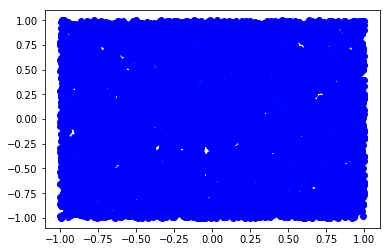

0.5631553872418359
0.010926393909863245
0.010826077503289748


In [130]:
# No correlation (is NOT redundant)
x = []
y = []
for i in range(10000):
    x.append(2 * random.random() - 1)
    y.append(1 - 2 * random.random())
plot.plot(x, y, "bo")
plot.show()
print(mutual_info(x, y))
print(kl_div(x, y))
print(kl_div(y, x))

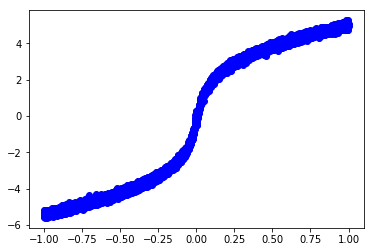

2.873595092079937
0.4333874283092583
0.3257781001088133


In [158]:
# Rate change (is redundant)
x = []
y = []
for i in range(10000):
    tmp = random.random()
    x.append(1 - (2 * tmp))
    if (1 - 2 * tmp) >= 0:
        y.append(5 - (2 * tmp) + (1 - 2 * tmp) / abs(1 - 2 * tmp) * np.log(0.01 + abs(1 - 2 * tmp)) + np.random.normal(0, 0.1))
    else:
        y.append(-3.4 - (2 * tmp) + (1 - 2 * tmp) / abs(1 - 2 * tmp) * np.log(0.01 + abs(1 - 2 * tmp)) + np.random.normal(0, 0.1))
plot.plot(x, y, "bo")
plot.show()
print(mutual_info(x, y))
print(kl_div(x, y))
print(kl_div(y, x))


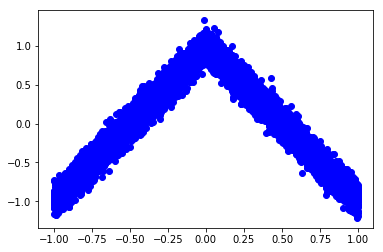

1.7667273061738842
0.25932335465544704
0.16759960246868572


In [131]:
# Piecewise 1 (is redundant)
x = []
y = []
for i in range(5000):
    tmp = random.random()
    x.append(tmp)
    y.append(1 - 2 * tmp + np.random.normal(0, 0.1))
for i in range(5000):
    tmp = random.random()
    x.append(-1 * tmp)
    y.append(1 - 2 * tmp + np.random.normal(0, 0.1))
plot.plot(x, y, "bo")
plot.show()
print(mutual_info(x, y))
print(kl_div(x, y))
print(kl_div(y, x))

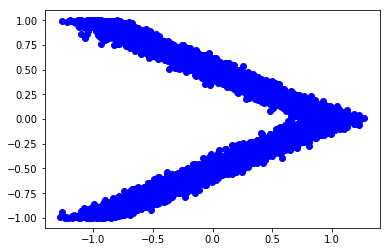

1.7630211061571146
0.15325315297576383
0.29069586904448225


In [132]:
# Piecewise 2 (is NOT redundant)
x = []
y = []
for i in range(5000):
    tmp = random.random()
    x.append(1 - 2 * tmp + np.random.normal(0, 0.1))
    y.append(tmp)
for i in range(5000):
    tmp = random.random()
    x.append(1 - 2 * tmp + np.random.normal(0, 0.1))
    y.append(-1 * tmp)
plot.plot(x, y, "bo")
plot.show()
print(mutual_info(x, y))
print(kl_div(x, y))
print(kl_div(y, x))